In [1]:
import causalpy as cp
import pandas as pd

### 13 - Difference-in-Differences 

In [6]:
data = pd.read_csv("data/billboard_impact.csv")

In [8]:
data.groupby(by=["poa", "jul"]).mean()

deposits
poa jul            
0   0    171.642308
    1    206.165500
1   0     46.016000
    1     87.063750

In [19]:
data = data.rename(columns={"jul": "post_treatment"})

In [23]:
data["unit"] = data.poa

In [ ]:
result = cp.pymc_experiments.DifferenceInDifferences(
    data,
    formula="deposits ~ 1 + poa*post_treatment",
    time_variable_name="post_treatment",
    group_variable_name="poa",
    model=cp.pymc_models.LinearRegression(),
)

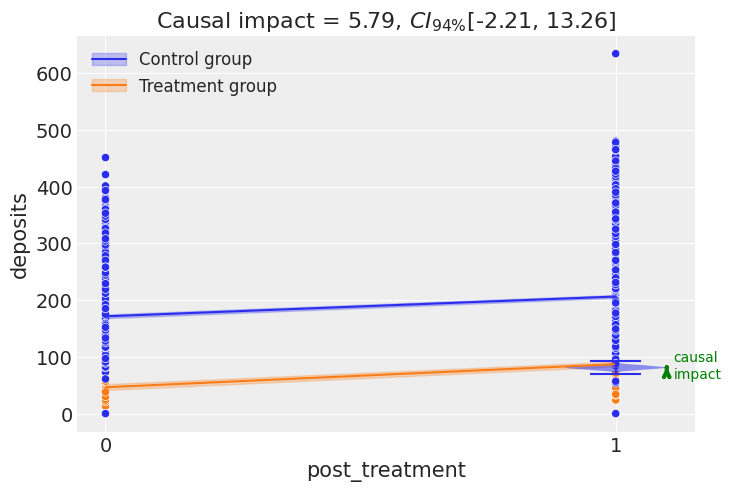

In [27]:
fig, ax = result.plot()

### 15 - Synthetic Controls

In [2]:
cigar = (pd.read_csv("data/smoking.csv")
         .drop(columns=["lnincome","beer", "age15to24", "california", "after_treatment", "retprice"]))

In [3]:
cigar.head(5)

,state,year,cigsale
0,1,1970,89.800003
1,1,1971,95.400002
2,1,1972,101.099998
3,1,1973,102.900002
4,1,1974,108.199997


In [53]:
cigar.year.nunique()

31

In [7]:
cigar.state.nunique()

39

In [4]:
piv = cigar.pivot(index="year", columns="state", values="cigsale")
treatment_time = 1989
unit = "s3"

piv.columns = ["s" + str(i) for i in list(piv.columns)]

In [5]:
piv = piv.rename(columns={unit: "actual"})

In [17]:
formula = " + ".join(list(piv.columns.drop("actual"))[:10])

In [18]:
result = cp.pymc_experiments.SyntheticControl(
    piv,
    treatment_time,
    formula="actual ~ 0 + " + formula,
    model=cp.pymc_models.WeightedSumFitter(
        sample_kwargs={"target_accept": 0.95}
    ),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 15 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


In [19]:
result.print_coefficients()

Model coefficients:
s1                            0.02, 94% HDI [0.00, 0.06]
s2                            0.01, 94% HDI [0.00, 0.05]
s4                            0.14, 94% HDI [0.01, 0.31]
s5                            0.07, 94% HDI [0.01, 0.19]
s6                            0.02, 94% HDI [0.00, 0.07]
s7                            0.01, 94% HDI [0.00, 0.05]
s8                            0.61, 94% HDI [0.45, 0.75]
s9                            0.04, 94% HDI [0.00, 0.13]
s10                           0.02, 94% HDI [0.00, 0.06]
s11                           0.05, 94% HDI [0.00, 0.15]
sigma                         3.62, 94% HDI [2.91, 4.49]


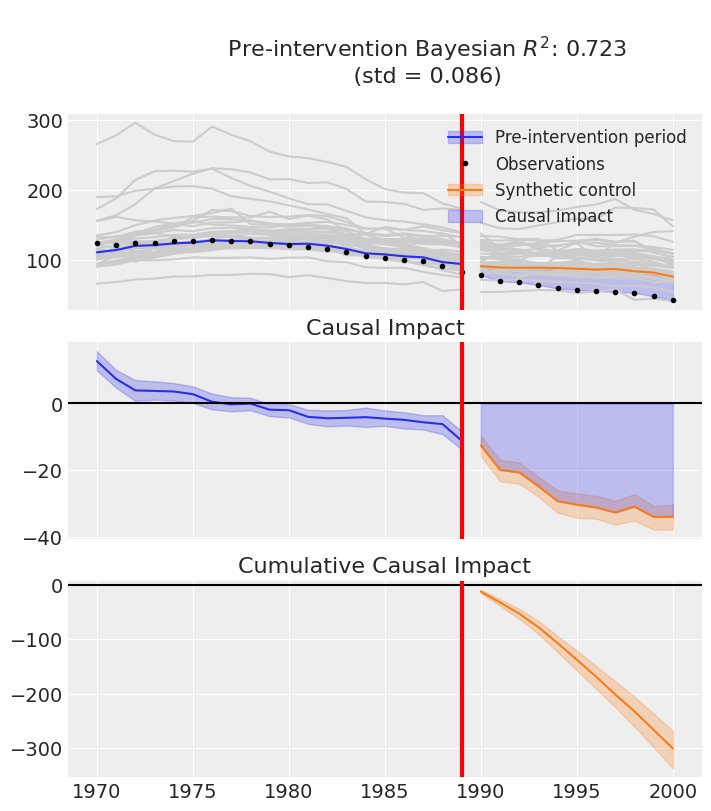

In [16]:
fig, ax = result.plot(plot_predictors=True)

### 16 - Regression Discontinuity

In [103]:
sheepskin = pd.read_csv("./data/sheepskin.csv")[["avgearnings", "minscore", "receivehsd", "n"]]
sheepskin.head()

,avgearnings,minscore,receivehsd,n
0,11845.086,-30.0,0.416667,12
1,9205.679,-29.0,0.387097,31
2,8407.745,-28.0,0.318182,44
3,11114.087,-27.0,0.377778,45
4,10814.624,-26.0,0.306667,75


In [106]:
df = cp.load_data("rd")

<Axes: xlabel='x', ylabel='y'>

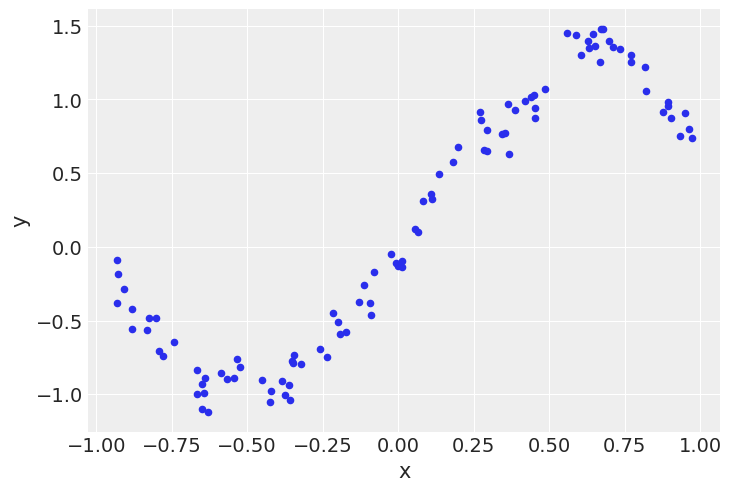

In [109]:
df.plot.scatter(x="x", y="y")